In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [61]:
# Simple convolution operation

A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[1, 0], [0, 1]])

C = A * B
print(C)
print(torch.sum(C))

tensor([[1, 0],
        [0, 4]])
tensor(5)


In [63]:
# Convolution with stride
def conv2d(A, K):
  a_h, a_w = A.shape
  k_h, k_w = K.shape
  o_h = a_h - k_h + 1
  o_w = a_w - k_w +1

  out = torch.zeros((o_h, o_w))

  for i in range(o_h):
    for j in range(o_w):
      c = A[i:i+k_h, j:j + k_w] * K
      out[i, j] = torch.sum(c)
  return out


a = torch.ones((4, 4))
k = torch.ones((2,2))
print(conv2d(a, k))


tensor([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]])


In [74]:
import torch
import torch.nn.functional as F

# convolution with stride and padding
# why do i need padding - to preserve information at the border
# 2) to keep spatial dimention
def conv2d(A, K, stride=1, padding=1):
    # Pad the input tensor
    A = F.pad(A, (padding, padding, padding, padding))

    a_h, a_w = A.shape
    k_h, k_w = K.shape

    o_h = (a_h - k_h) // stride + 1
    o_w = (a_w - k_w) // stride + 1

    out = torch.zeros((o_h, o_w))

    for i in range(0, o_h, stride):
        for j in range(0, o_w, stride):
            c = A[i: i + k_h, j: j + k_w] * K
            out[i, j] = torch.sum(c)

    return out

a = torch.ones((5, 5))
k = torch.ones((3, 3))

print(conv2d(a, k, stride=2, padding=2))


tensor([[1., 0., 3., 0.],
        [0., 0., 0., 0.],
        [3., 0., 9., 0.],
        [0., 0., 0., 0.]])


In [75]:
# Create a 2D convolution layer
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=1, padding=2)

# Manually set the weights and bias of the convolution layer
conv.weight.data = torch.Tensor([[[[1, 2], [3, 4]]]])
conv.bias.data.fill_(0)

# Create a 3x3 input with a batch size of 1
input = torch.Tensor([[[[1, 1, 1], [1, 1, 1], [1, 1, 1]]]])
output = conv(input)

print(output)

tensor([[[[ 0.,  0.,  0.,  0.,  0.,  0.],
          [ 0.,  4.,  7.,  7.,  3.,  0.],
          [ 0.,  6., 10., 10.,  4.,  0.],
          [ 0.,  6., 10., 10.,  4.,  0.],
          [ 0.,  2.,  3.,  3.,  1.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.]]]], grad_fn=<ConvolutionBackward0>)


In [20]:
# step1: Define the architecture
# conv = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)

class MyConv2d(nn.Module):
  def __init__(self, in_channels, out_channels=1, kernel_size=2, stride=1, padding=2 ):
    super(MyConv2d, self).__init__()
    self.in_channels  = in_channels
    self.out_channels = out_channels
    self.kernel_size = kernel_size
    self.stride = stride
    self.padding = padding

    # this would define number of neuros to carry out
    self.weights = nn.Parameter(torch.randn(in_channels, out_channels, kernel_size, kernel_size))
    self.bias = nn.Parameter(torch.zeros(out_channels))


  def __call__(self, x):
    return self.forward(x)

  def forward(self, x): # x is of shape (batch_size, channels, width, height)
    # create feature map for with each filter by applying convolution
    # Add zero padding to the input tensor
    print(f'weights {self.weights}')
    print(f'bais {self.bias}')
    x = F.pad(x, (self.padding, self.padding, self.padding, self.padding))
    batch_size = x.shape[0]
    h, w = x.shape[2], x.shape[3]
    o_h = int(h-self.kernel_size // self.stride) + 1
    o_w = int(w-self.kernel_size // self.stride) + 1
    out  = torch.zeros((batch_size, self.out_channels, o_h, o_w))
    print(f'input {x}')
    print(out.shape)
    for i in range(0, h-self.kernel_size, self.stride):
      for j in range(0, w-self.kernel_size, self.stride):
        out[:,:,i//self.stride,j//self.stride] = \
                (x[:,:,i:i+self.kernel_size,j:j+self.kernel_size].unsqueeze(2) * self.weights.unsqueeze(0)).sum([1,3,4]) + self.bias

    return out


In [22]:
# Create a 2D convolution layer
conv = MyConv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=2)

# Create a 3x3 input with a batch size of 1
input = torch.Tensor([[[[1, 1, 1], [1, 1, 1], [1, 1, 1]]]])
output = conv(input)

print(output)

weights Parameter containing:
tensor([[[[-1.9068,  0.4404, -0.0431],
          [ 1.1065,  0.6826,  0.9058],
          [ 0.8525, -2.1610,  0.3624]]]], requires_grad=True)
bais Parameter containing:
tensor([0.], requires_grad=True)
input tensor([[[[0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.]]]])
torch.Size([1, 1, 5, 5])
tensor([[[[ 0.3624, -1.7985, -0.9460, -1.3085,  0.0000],
          [ 1.2683, -0.2101,  1.7489,  0.4806,  0.0000],
          [ 1.2251,  0.1872,  0.2393, -0.9858,  0.0000],
          [ 0.8627,  1.9857,  1.1853,  0.3227,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]],
       grad_fn=<CopySlices>)


In [56]:
class LearnCNN(nn.Module):
  def __init__(self, in_channels=1, out_features=10, img_width=28, img_height=28):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=3)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
    self.linear1 = nn.Linear(in_features=128*22*22, out_features=22*22)
    self.linear2 = nn.Linear(in_features=22*22, out_features=out_features)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = x.view(-1, 128 * 22 * 22)
    x = self.linear1(x)
    x = self.linear2(x)
    return x

In [50]:
from torch.utils import data
# step2: Data preparation - MNIST
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# Download dataset
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

full_data = datasets.MNIST('./data', download=True, transform=transform)

train_size = int(len(full_data) * 0.7)
val_size = int(len(full_data) * 0.1)
# Deduct the sum of train_size and val_size from total size for test_size
test_size = len(full_data) - train_size - val_size

# Now, you can be sure that train_size + test_size + val_size == len(full_data)
train_set, test_set, val_set = random_split(full_data, [train_size, test_size, val_size])
print(len(train_set), len(test_set), len(val_set))

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
valid_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)



42000 12000 6000


In [51]:
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break


torch.Size([32, 1, 28, 28]) torch.Size([32])


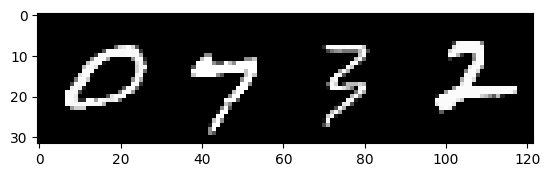

In [52]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Move the images to cpu
generated_images = images[:4]

# Create a grid of images and convert it to numpy
grid = torchvision.utils.make_grid(generated_images, nrow=8)
npimg = grid.numpy()

# Plot the grid of images
# Plot the images
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

In [58]:
# Step3: Training

# hyper parameters

batch_size = 32
channels = 3
width = 28
height = 28


model = LearnCNN()

# training loop
loss_func = nn.CrossEntropyLoss()

model.train()
# Specify the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
n_epochs = 10
for epoch in range(n_epochs):
  for images, labels in train_loader:
    y_preds = model(images)
    # why ? loss -negative log likely hood
    # logits
    #y_preds = F.softmax(y_preds)
    # loss calculation
    loss = loss_func(y_preds, labels)
    # zero the gradients
    optimizer.zero_grad()
    # calculate graidents
    loss.backward()
    # update weights
    optimizer.step()
    # Print the loss for this epoch
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Streaming output truncated to the last 5000 lines.
Epoch 4, Loss: 0.1004931628704071
Epoch 4, Loss: 0.0486748106777668
Epoch 4, Loss: 0.5786982178688049
Epoch 4, Loss: 0.12322651594877243
Epoch 4, Loss: 0.021175287663936615
Epoch 4, Loss: 0.14767418801784515
Epoch 4, Loss: 0.5018677115440369
Epoch 4, Loss: 0.012653783895075321
Epoch 4, Loss: 0.26241955161094666
Epoch 4, Loss: 0.01444295421242714
Epoch 4, Loss: 0.7416253089904785
Epoch 4, Loss: 0.08254769444465637
Epoch 4, Loss: 0.036597657948732376
Epoch 4, Loss: 0.3064946234226227
Epoch 4, Loss: 0.13408970832824707
Epoch 4, Loss: 0.11757722496986389
Epoch 4, Loss: 0.13866470754146576
Epoch 4, Loss: 0.012142366729676723
Epoch 4, Loss: 0.24097402393817902
Epoch 4, Loss: 0.11406210064888
Epoch 4, Loss: 0.3237355649471283
Epoch 4, Loss: 0.04385310783982277
Epoch 4, Loss: 0.01654493808746338
Epoch 4, Loss: 0.005049933213740587
Epoch 4, Loss: 0.06430166214704514
Epoch 4, Loss: 0.10662804543972015
Epoch 4, Loss: 0.04041578993201256
Epoch 4, 

KeyboardInterrupt: ignored

In [59]:
model.eval()

LearnCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (linear1): Linear(in_features=61952, out_features=484, bias=True)
  (linear2): Linear(in_features=484, out_features=10, bias=True)
)

In [60]:
for images, labels in test_loader:
   y_preds = model(images)
   print(y_preds)
   loss = loss_func(y_preds, labels)
   print(loss)
   break

tensor([[-2.0257e+01, -7.0234e+00,  3.8788e+00, -5.8772e+00,  2.0063e+01,
          1.3634e+00, -6.9011e+00,  1.9051e+00, -6.4051e+00,  1.1007e+01],
        [-8.7592e+00, -3.9677e-01,  4.5550e+00,  5.5583e+00, -1.8442e+00,
         -5.4581e+00, -1.8540e+01,  1.8654e+01,  6.8505e-01,  8.6095e+00],
        [-4.0671e+00,  9.2953e+00, -7.5580e-01, -3.8358e+00,  1.9746e+00,
         -1.2763e+00, -9.3266e-02,  3.2625e+00, -2.1813e+00,  1.1663e-01],
        [ 1.9488e+00, -8.1858e-01,  2.2591e+01,  2.9934e+00,  1.7540e+00,
         -6.0628e+00,  3.7299e+00,  2.7626e-01,  8.7585e+00, -5.0481e+00],
        [-6.0574e+00,  9.5596e+00,  2.5266e+01,  1.2711e+01, -4.4929e+00,
         -9.9379e+00, -1.0616e+01,  9.4359e+00,  7.3738e-01,  8.7010e+00],
        [-3.9277e+00, -6.5391e+00,  1.5021e+01,  4.1709e+00,  5.5976e+00,
         -6.0165e+00, -9.9175e+00,  5.7091e+00,  9.5399e+00,  7.6735e+00],
        [-6.0174e+00, -1.6279e+01,  4.6783e+00,  2.0585e+01, -1.9072e+01,
         -3.3803e+00, -2.2194e+0

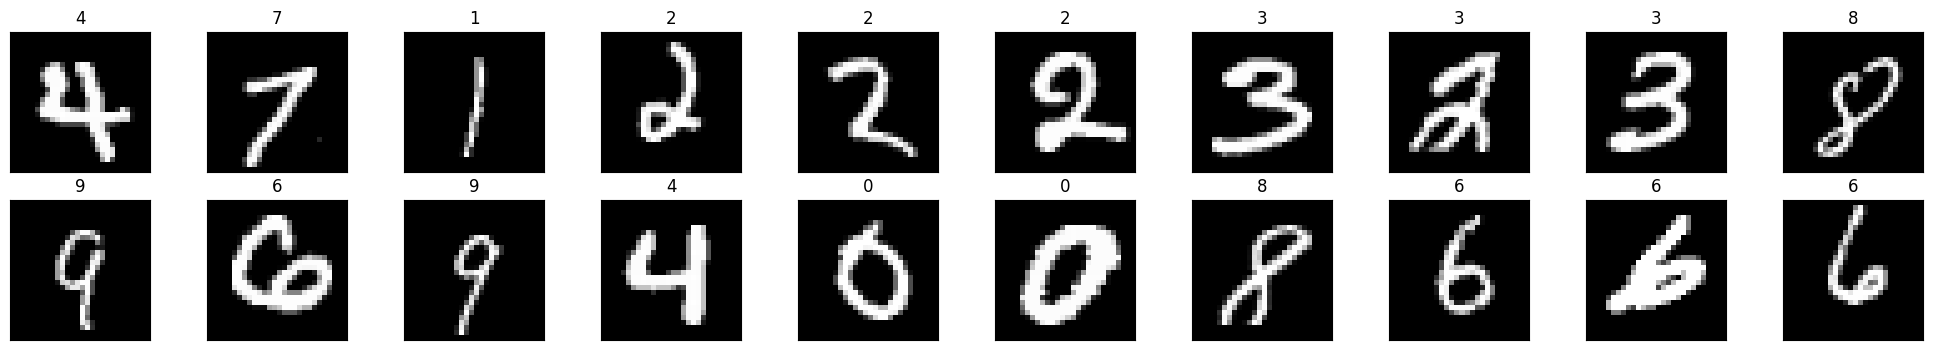

In [61]:
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Get a batch of images and labels from the test loader
images, labels = next(iter(test_loader))

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Plot the images in the batch, along with predicted labels
fig = plt.figure(figsize=(25, 4))

for idx in range(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].squeeze(), cmap='gray')
    ax.set_title(str(predicted[idx].item()))


In [62]:
# Set the model to evaluation mode
model.eval()

test_loss = 0
correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        output = model(images)

        # Calculate loss
        loss = loss_func(output, labels)

        # Update test loss
        test_loss += loss.item()*images.size(0)

        # Convert output probabilities to predicted class
        _, preds = torch.max(output, 1)

        # Compare predictions to true label
        correct += (preds == labels).sum().item()

# Calculate average losses
test_loss = test_loss/len(test_loader.dataset)

print('Test Loss: {:.6f}\n'.format(test_loss))

# Calculate accuracy
accuracy = correct / len(test_loader.dataset)

print('\nTest Accuracy: {:.3f} ({}/{})'.format(accuracy, correct, len(test_loader.dataset)))


Test Loss: 0.201126


Test Accuracy: 0.949 (11382/12000)
